In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.style.use('ggplot')



df1 = pd.read_csv("~/Documents/DS/Scrapy/Reddit-r-nba-scrapy/Reddit_r_nba/data/export.csv", header=0)

# drop duplicates where titles are the same
df2 = df1.copy()
df2 = df2.drop_duplicates(subset = 'title')

# check lengths to make sure duplicate titles are dropped
print(len(df2))
print(len(df1))

df2.head(1)

1335
1823


,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,title
0,33,nymusix,57 comments,34,7 hours ago,32,[The Comeback] The NBA and its fans are now th...


## Clean data

In [260]:
# remove 'comments' from number_of_comments
df2['number_of_comments'] = df2.number_of_comments.str.rstrip('comments')

# convert strings to floats
list_to_change = ['number_of_comments'
,'score_dislikes_numbers'
,'score_likes_numbers'
,'score_unvoted_numbers']

for col in list_to_change:  
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    # confirm type is converted
    print(type(df2[col][0]))

# df2['number_of_comments'] = pd.to_numeric(df2['number_of_comments'], errors='coerce')
# df2['score_dislikes_numbers'] = pd.to_numeric(df2['score_dislikes_numbers'], errors='coerce')
# df2['score_likes_numbers'] = pd.to_numeric(df2['score_likes_numbers'], errors='coerce')
# df2['score_unvoted_numbers'] = pd.to_numeric(df2['score_unvoted_numbers'], errors='coerce')

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


## Clean up words in title, remove stopwords

In [261]:
import re
import nltk
from nltk.corpus import stopwords

def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [262]:
clean_title=[]
for title in df2['title']:
    clean_title.append(to_words(title))

In [263]:
clean_title[:20]

['comeback nba fans progressive major sports',
 'josh howard calls career moves coaching hometown college team',
 'james harden full highlights vs nuggets pts',
 'report rockets retire yao ming jersey',
 'curry golfing potus',
 'joe johnson hall fame',
 'scottie pippen ultimate defender',
 'shaq vs chuck mma compilation',
 'paul pierce passes larry bird time celtics scoring list gets nice ovation garden',
 'brian scalabrine showing modesty',
 'unpopular opinion team next season',
 'records think broken set nba season',
 'okc james harden posterizes jj hickson',
 'david robinson highlights',
 'al jefferson says take pay cut remain charlotte hornets',
 'synergy sports tech twitter quick look pgs finishing rim',
 'eastern european stories',
 'shaq cries fine',
 'reinsdorf let noah walk frontline guy',
 'sources duke barring nba teams practices holding pro days first time']

In [264]:
# append cleaned titles to df2 and drop the old title
df2['clean_title'] = clean_title
df2.drop('title', axis =1, inplace=True)

In [265]:
df2[:3]

,score_unvoted_numbers,author,number_of_comments,score_likes_numbers,time_submitted_ago,score_dislikes_numbers,clean_title
0,33.0,nymusix,57.0,34.0,7 hours ago,32.0,comeback nba fans progressive major sports
1,22.0,WizOfAwesSite,13.0,23.0,5 hours ago,21.0,josh howard calls career moves coaching hometo...
2,27.0,GettingLostInDaSauce,10.0,28.0,6 hours ago,26.0,james harden full highlights vs nuggets pts


## Frequency of words

In [266]:
word_counter = []
for title in clean_title:
    words = title.split()
    for i in words:
        word_counter.append(i)


In [273]:
# append to a new data frame
df_words = pd.DataFrame(word_counter)
df_words.columns = ['appearances']

# get counts of words and make a new dataframe with it
word_count = df_words['appearances'].value_counts()
word_count = pd.DataFrame(word_count)
word_count.head()

,appearances
nba,249
game,122
season,99
team,97
vs,81


In [274]:
# total number of appearances of words
total_num_words = word_count.sum()

# number of unique words
len(word_count)




3291

In [278]:
less_than_20_times = word_count[word_count['appearances'] < 20.0]
less_than_20_times[:10]

,appearances
magic,19
playoff,19
russell,19
knicks,19
trade,18
greatest,18
rockets,18
pass,17
raptors,17
today,17


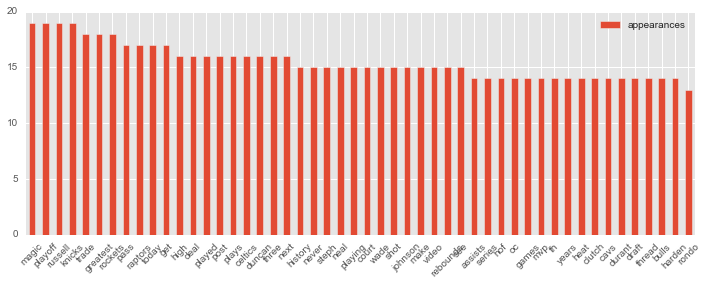

In [283]:
df_less_20 = pd.DataFrame(less_than_20_times)
df_less_20[:50].plot(kind = 'bar', figsize = (12,4), rot = 45 )

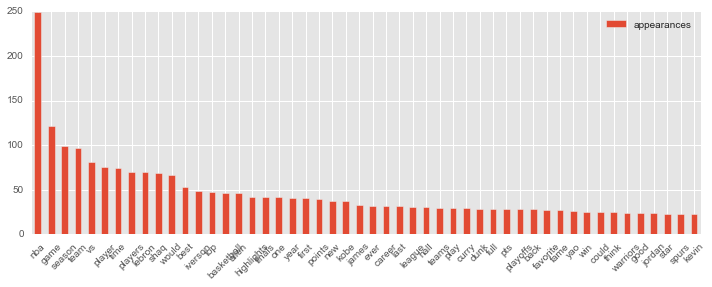

In [284]:
word_count[:50].plot(kind='bar', figsize = (12,4), rot = 45)